In [358]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [359]:
dir(iris) 

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [360]:
iris.feature_names 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [361]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [362]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [363]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [364]:
df0 = df[df.target==0]
df1 =df[df.target==1]
df2 =df[df.target==2]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [365]:
df['flower_name'] = df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [366]:
import matplotlib.pyplot as plt
%matplotlib inline 

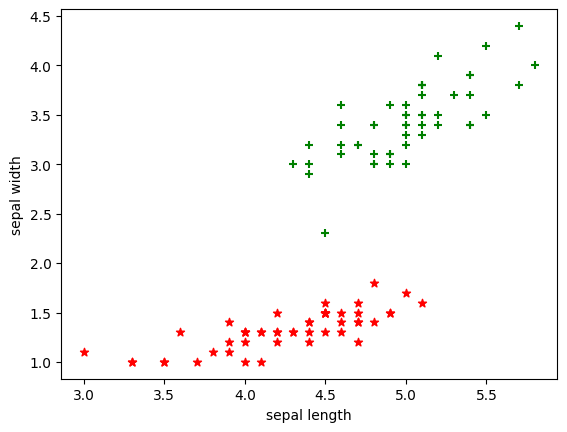

In [367]:
# ---------------- sepal length vs sepal width(setosa vs versicolor) ------------------------
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',marker='*')

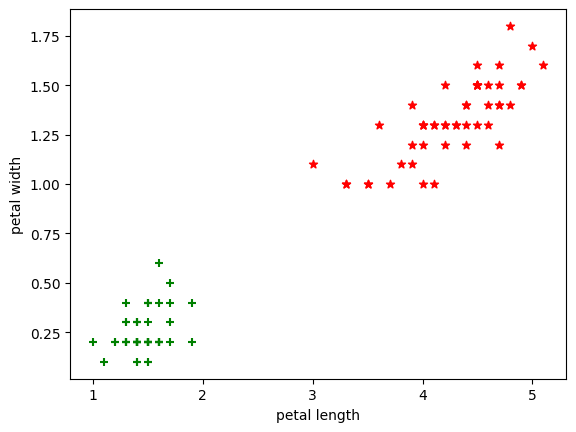

In [368]:
# ---------------- petal length vs petal width(setosa vs versicolor) ------------------------
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',marker='*')

In [369]:
# ------------ Train Test Split ------------------------
from sklearn.model_selection import train_test_split


In [370]:
X = df.drop(['target','flower_name'],axis='columns')
y = df.target

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [372]:
len(X_train)

120

In [373]:
len(X_test)

30

In [374]:
                                    # ---------------------- Creat KNN -------------------

In [375]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [376]:
knn.fit(X_train,y_train) 

KNeighborsClassifier(n_neighbors=10)

In [377]:
knn.score(X_test,y_test) 

0.9666666666666667

In [378]:
knn.predict([[4.9,3,1.2,0.2]]) 

c:\Users\tahur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [379]:
#  ----------------------- Confusion Matrix -------------------

In [380]:
from sklearn.metrics import confusion_matrix
y_predict = knn.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

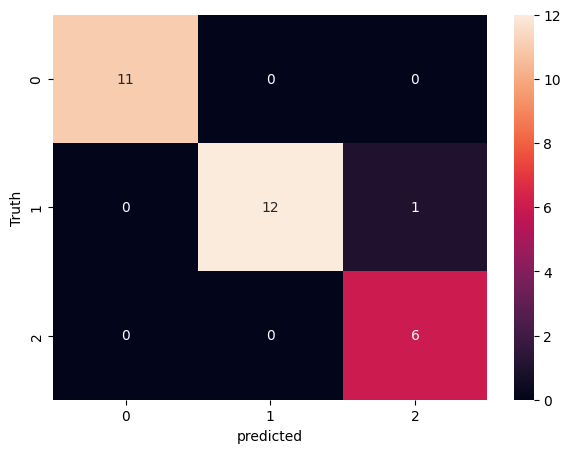

In [381]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [382]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



--------------- Exercise ---------------------------

In [383]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits() 

In [384]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [385]:
digits.target 

array([0, 1, 2, ..., 8, 9, 8])

In [386]:
digits.target_names  


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [387]:
de = pd.DataFrame(digits.data,digits.target)
de.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [388]:
de['target'] = digits.target
de.head(10)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [389]:
A =de.drop('target',axis='columns')
b =de.target

In [390]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A,b,test_size=0.2,random_state=1)


In [391]:
# ////////////////////  Create KNN Classifier /////////////////


In [392]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)

In [393]:
kn.fit(A_train,b_train)

KNeighborsClassifier()

In [394]:
kn.score(A_test,b_test)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [ ]:
from sklearn.metrics import confusion_matrix
b_pred = kn.predict(A_test)
cm = confusion_matrix(b_test, b_pred)
cm

AttributeError: 'Flags' object has no attribute 'c_contiguous'

Text(58.222222222222214, 0.5, 'Truth')

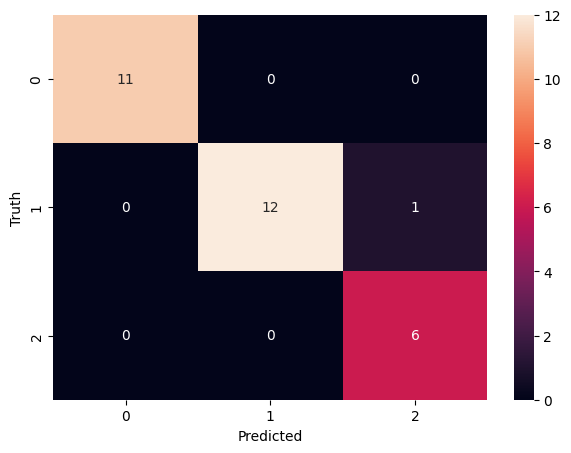

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')